In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/alber/Downloads/neuro_norm.csv')
data

,Comune,2013,2014,2015,2016,2017,2018,2019
0,Abbiategrasso,0.016428,0.016989,0.017667,0.018735,0.018315,0.018209,0.018723
1,Albairate,0.012159,0.013370,0.014944,0.014826,0.014960,0.016656,0.016046
2,Arconate,0.013599,0.014080,0.014322,0.015272,0.017313,0.017932,0.017690
3,Arese,0.013150,0.014442,0.015614,0.016673,0.015782,0.016685,0.017040
4,Arluno,0.016271,0.018882,0.019066,0.018494,0.017826,0.017764,0.018274
...,...,...,...,...,...,...,...,...
135,"Fiera, Gallaratese, Quarto Oggiaro",0.019169,0.019333,0.019825,0.019420,0.019285,0.018864,0.018887
136,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",0.014530,0.014980,0.015087,0.014826,0.014853,0.014520,0.014257
137,"Stazione Garibaldi, Niguarda",0.016228,0.016791,0.016778,0.016803,0.016863,0.016812,0.016819
138,"Vigentino, Chiaravalle, Gratosoglio",0.016390,0.016881,0.017627,0.017620,0.017474,0.017531,0.017657


In [2]:
dict_municipi = {"Centro" : "Centro Storico", "Barona, Lorenteggio" : "Barona Lorenteggio", "Baggio, De Angeli, San Siro": "San Siro Baggio Trenno",
                "Stazione Garibaldi, Niguarda": "Stazione Garibaldi Niguarda", "Città Studi, Lambrate, Venezia": "Città Studi Lambrate",
                "Vittoria, Forlanini": "Vittoria Forlanini", "Stazione Centrale, Gorla, Turro, Greco, Crescenzago": "Stazione Centrale Bicocca",
                "Vigentino, Chiaravalle, Gratosoglio": "Vigentino Chiaravalle Gratosoglio", "Fiera, Gallaratese, Quarto Oggiaro": "Fiera Gallaratese Quarto Oggiaro"}
data = data.replace({"Comune": dict_municipi})
data

,Comune,2013,2014,2015,2016,2017,2018,2019
0,Abbiategrasso,0.016428,0.016989,0.017667,0.018735,0.018315,0.018209,0.018723
1,Albairate,0.012159,0.013370,0.014944,0.014826,0.014960,0.016656,0.016046
2,Arconate,0.013599,0.014080,0.014322,0.015272,0.017313,0.017932,0.017690
3,Arese,0.013150,0.014442,0.015614,0.016673,0.015782,0.016685,0.017040
4,Arluno,0.016271,0.018882,0.019066,0.018494,0.017826,0.017764,0.018274
...,...,...,...,...,...,...,...,...
135,Fiera Gallaratese Quarto Oggiaro,0.019169,0.019333,0.019825,0.019420,0.019285,0.018864,0.018887
136,Stazione Centrale Bicocca,0.014530,0.014980,0.015087,0.014826,0.014853,0.014520,0.014257
137,Stazione Garibaldi Niguarda,0.016228,0.016791,0.016778,0.016803,0.016863,0.016812,0.016819
138,Vigentino Chiaravalle Gratosoglio,0.016390,0.016881,0.017627,0.017620,0.017474,0.017531,0.017657


In [3]:
data = data.drop(['2017', '2018', '2019'], axis=1)
data.shape

(140, 5)

In [4]:
new_data = pd.DataFrame(columns=['Comune','Neuro_incidence','Year'])

for i in range(len(data.columns)-1):
    temp = data[['Comune', data.columns[i+1]]]
    year = temp.columns[-1]
    temp = temp.rename(columns={temp.columns[-1]: 'Neuro_incidence'})
    temp['Year'] = year
    new_data = pd.concat([new_data, temp], ignore_index=True)
    
new_data['Year'] = new_data['Year'].astype('int64')
new_data

,Comune,Neuro_incidence,Year
0,Abbiategrasso,0.016428,2013
1,Albairate,0.012159,2013
2,Arconate,0.013599,2013
3,Arese,0.01315,2013
4,Arluno,0.016271,2013
...,...,...,...
555,Fiera Gallaratese Quarto Oggiaro,0.01942,2016
556,Stazione Centrale Bicocca,0.014826,2016
557,Stazione Garibaldi Niguarda,0.016803,2016
558,Vigentino Chiaravalle Gratosoglio,0.01762,2016


In [5]:
# OFFICIAL
import numpy as np
outcome = []
multiplicator = []
med = new_data['Neuro_incidence'].median()

for i in range(len(new_data)):
    multiplicator.append(abs(np.round(new_data['Neuro_incidence'][i] - med, 2))*100)
    if new_data['Neuro_incidence'][i] >= med:
        outcome.append(1)
    else:
        outcome.append(0)
    
new_data['Multiplicator'] = multiplicator
new_data['Label'] = outcome

In [6]:
# import numpy as np
# outcome = []
# multiplicator = []
# med_2013 = new_data[new_data['Year'] == 2013]['Neuro_incidence'].median()
# med_2014 = new_data[new_data['Year'] == 2014]['Neuro_incidence'].median()
# med_2015 = new_data[new_data['Year'] == 2015]['Neuro_incidence'].median()
# med_2016 = new_data[new_data['Year'] == 2016]['Neuro_incidence'].median()

# for i in range(len(new_data)):
#     if new_data['Year'][i] == 2013:
#         multiplicator.append(abs(np.round(new_data['Neuro_incidence'][i] - med_2013, 2))*100)
#         if new_data['Neuro_incidence'][i] >= med_2013:
#             outcome.append(1)
#         else:
#             outcome.append(0)
#     elif new_data['Year'][i] == 2014:
#         multiplicator.append(abs(np.round(new_data['Neuro_incidence'][i] - med_2014, 2))*100)
#         if new_data['Neuro_incidence'][i] >= med_2014:
#             outcome.append(1)
#         else:
#             outcome.append(0)
#     elif new_data['Year'][i] == 2015:
#         multiplicator.append(abs(np.round(new_data['Neuro_incidence'][i] - med_2015, 2))*100)
#         if new_data['Neuro_incidence'][i] >= med_2015:
#             outcome.append(1)
#         else:
#             outcome.append(0)
#     else:
#         multiplicator.append(abs(np.round(new_data['Neuro_incidence'][i] - med_2016, 2))*100)
#         if new_data['Neuro_incidence'][i] >= med_2016:
#             outcome.append(1)
#         else:
#             outcome.append(0)
    
# new_data['Multiplicator'] = multiplicator
# new_data['Label'] = outcome

In [7]:
new_data

,Comune,Neuro_incidence,Year,Multiplicator,Label
0,Abbiategrasso,0.016428,2013,0.0,1
1,Albairate,0.012159,2013,0.0,0
2,Arconate,0.013599,2013,0.0,0
3,Arese,0.01315,2013,0.0,0
4,Arluno,0.016271,2013,0.0,1
...,...,...,...,...,...
555,Fiera Gallaratese Quarto Oggiaro,0.01942,2016,0.0,1
556,Stazione Centrale Bicocca,0.014826,2016,0.0,0
557,Stazione Garibaldi Niguarda,0.016803,2016,0.0,1
558,Vigentino Chiaravalle Gratosoglio,0.01762,2016,0.0,1


In [8]:
new_data['Multiplicator'].value_counts()

0.0    529
1.0     31
Name: Multiplicator, dtype: int64

In [9]:
new_data.to_csv('Health_data_preprocessed/neuro_preprocessed.csv', index=False)

<AxesSubplot:xlabel='Year', ylabel='count'>

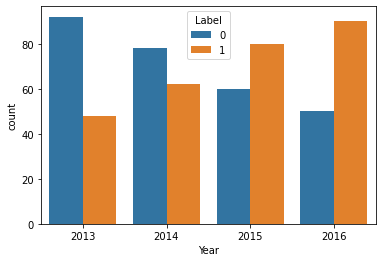

In [10]:
import seaborn as sns
sns.countplot(x='Year', hue='Label', data=new_data)